<a href="https://colab.research.google.com/github/siamislam1603/Soft-Computing-Lab/blob/text-classification/Text%20Classification/170104124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
%matplotlib inline

### Read the csv using pandas dataframe

In [ ]:
dataset_dir='drive/MyDrive/Soft Computing Lab/Assignment 3/Dataset 2.csv'

In [ ]:
df=pd.read_csv(dataset_dir,encoding="ISO-8859-1")
df.head()

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
df.shape

(10314, 2)

### Frequency count of Polarity

In [ ]:
df['polarity'].value_counts()

0    8000
1    2314
Name: polarity, dtype: int64

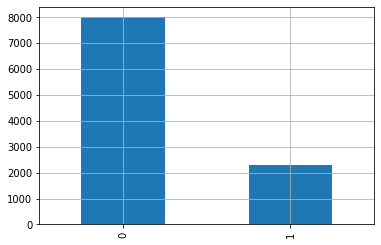

In [ ]:
df['polarity'].value_counts().plot(kind='bar',grid=True);

### Splitted the data into X & y

In [ ]:
X=df.drop('polarity',axis=1)
y=df['polarity']
X.shape,y.shape

((10314, 1), (10314,))

### Importing necessary nltk libraries for preprocessing the text

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Stemming the cleaned text

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(X)):
    text = re.sub('[^a-zA-Z]', ' ', X['text'][i])
    text = text.lower()
    text = text.split()
    
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [ ]:
corpus[:5]

['real good moment missssssssss much',
 'read manga http plurk com p mzp e',
 'comeagainjen http twitpic com lx http www youtub com watch v zogfqvh',
 'lapcat need send em account tomorrow oddli even refer tax support evid though',
 'add myspac myspac com lookthund']

### One-hot representation of stemmed_text according to vocabulary size

In [ ]:
voc_size=5000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[:5]

[[3260, 98, 2710, 1891, 2218],
 [1032, 4106, 4165, 2853, 2628, 4924, 2350, 2135],
 [503, 4165, 1061, 2628, 99, 4165, 1403, 1595, 2628, 1315, 4506, 371],
 [2657, 4877, 3168, 643, 175, 3738, 1450, 4999, 1965, 1979, 4898, 4911, 3331],
 [935, 4791, 4791, 2628, 1014]]

#### Made the fixed length sentences using `pad_sequences`

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2710 1891 2218]
 [   0    0    0 ... 4924 2350 2135]
 [   0    0    0 ... 1315 4506  371]
 ...
 [   0    0    0 ... 4165 4039 1741]
 [   0    0    0 ... 1859 1149  643]
 [   0    0    0 ...    0    0    0]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 3260,   98, 2710, 1891, 2218], dtype=int32)

### More than 2-Stacked LSTM model

In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 20, 100)           56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               8

### Split the data into train, validation and test set

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((10314, 20), (10314,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)
X_train,X_validation,y_train,y_validation=train_test_split(X_train1,y_train1,test_size=0.2,random_state=42)

### Train the model

In [ ]:
model_history=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=10,batch_size=64)

Epoch 1/10
104/104 [==============================] - 10s 39ms/step - loss: 0.3460 - accuracy: 0.8680 - val_loss: 0.1291 - val_accuracy: 0.9576
Epoch 2/10
104/104 [==============================] - 3s 28ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0496 - val_accuracy: 0.9915
Epoch 3/10
104/104 [==============================] - 3s 28ms/step - loss: 0.0143 - accuracy: 0.9974 - val_loss: 0.0577 - val_accuracy: 0.9891
Epoch 4/10
104/104 [==============================] - 3s 27ms/step - loss: 0.0102 - accuracy: 0.9983 - val_loss: 0.0480 - val_accuracy: 0.9873
Epoch 5/10
104/104 [==============================] - 3s 27ms/step - loss: 0.0082 - accuracy: 0.9986 - val_loss: 0.0624 - val_accuracy: 0.9891
Epoch 6/10
104/104 [==============================] - 3s 28ms/step - loss: 0.0071 - accuracy: 0.9988 - val_loss: 0.0571 - val_accuracy: 0.9885
Epoch 7/10
104/104 [==============================] - 3s 27ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0749 - val_accuracy: 0.986

### Loss curves

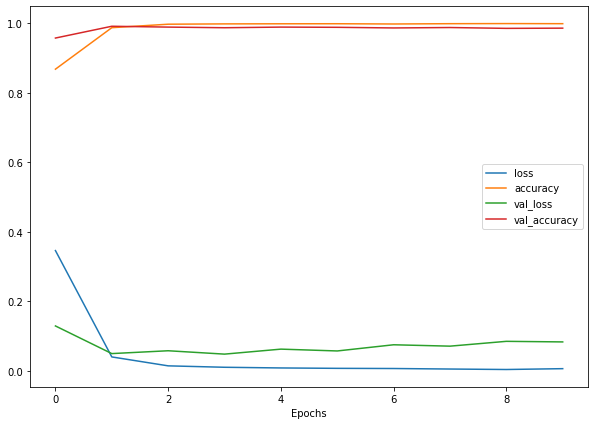

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(10,7),xlabel='Epochs');

### Evaluate the model on test-set

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

65/65 [==============================] - 1s 9ms/step - loss: 0.0795 - accuracy: 0.9879
Model loss on test set: 0.07949882000684738
Model accuracy on test set: 98.79%


> **`Confusion matrix`**

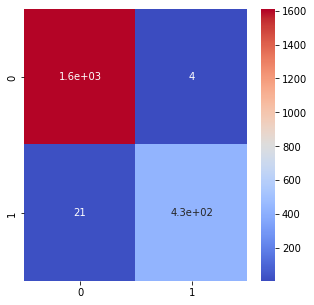

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
y_pred=tf.round(model.predict(X_test))
conf_mat=confusion_matrix(y_test,y_pred)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(conf_mat,cmap='coolwarm',annot=True)

> **`Classification report`**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1614
           1       0.99      0.95      0.97       449

    accuracy                           0.99      2063
   macro avg       0.99      0.98      0.98      2063
weighted avg       0.99      0.99      0.99      2063



> **`Accuracy`, `Precision`, `Recall`, `F1-Score`**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(Y_test,Y_pred):
  accuracy=accuracy_score(Y_test,Y_pred)
  precision=precision_score(Y_test,Y_pred)
  recall=recall_score(Y_test,Y_pred)
  f1=f1_score(Y_test,Y_pred)
  metric_dict={'Accuracy':round(accuracy*100,2),
      "Precision":round(precision*100,2),
      "Recall":round(recall*100,2),
      "F1-Score":round(f1*100,2)}
  return metric_dict

In [ ]:
performance_mat=evaluate_preds(y_test,y_pred)
perf_mat_series=pd.Series(performance_mat)
perf_mat_series

Accuracy     98.79
Precision    99.07
Recall       95.32
F1-Score     97.16
dtype: float64

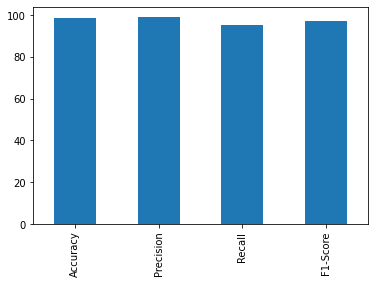

In [ ]:
perf_mat_series.plot(kind='bar');

### Github Link: [Text Classification](https://github.com/siamislam1603/Soft-Computing-Lab/tree/text-classification/Text%20Classification)